In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Пример задачи<a class="anchor" id="example"></a><center>

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

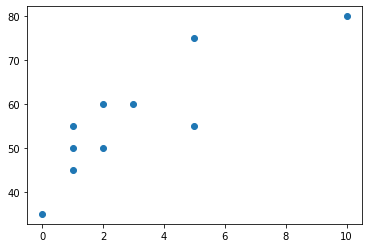

In [5]:
plt.scatter(X[:, 1], y);

Уравнение прямой: $y = a*x + b$

In [6]:
y_pred1 = 5 * X[:, 1] + 35 * X[:, 0] 
y_pred2 = 7.5 * X[:, 1] + 40 * X[:, 0]

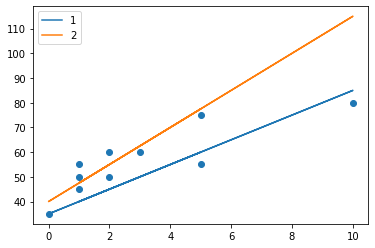

In [7]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1')
plt.plot(X[:, 1], y_pred2, label='2')
plt.legend()
plt.show()

Отклонение

In [8]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65, -60.0)

MAE (Mean Absolute Error)

In [9]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [10]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

### Метод наименьших квадратов (МНК)

$$w = (X^{T}X)^{-1}X^{T}y.$$


In [11]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [12]:
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical

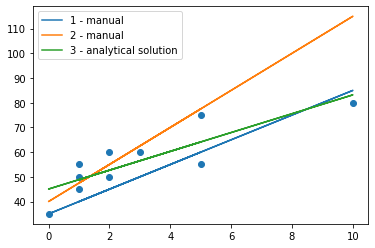

In [13]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1 - manual')
plt.plot(X[:, 1], y_pred2, label='2 - manual')
plt.plot(X[:, 1], y_pred_analytical, label='3 - analytical solution')
plt.legend()
plt.show()

In [14]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [15]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [16]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [17]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.7875, 43.96875)

### Градиентный спуск

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


In [18]:
W = np.random.normal(size=(X.shape[1]))
W

array([ 0.28423732, -1.13851623])

In [19]:
eta = 0.02 # величина шага

In [20]:
X.shape,  W.shape

((10, 2), (2,))

In [21]:
n = len(y)
dQ = 2/n * X.T @ (X @ W - y) # градиент функции ошибки
dQ

array([-119.26262274, -437.00412791])

In [22]:
grad = eta * dQ
grad

array([-2.38525245, -8.74008256])

In [23]:
print(f'previous weights', W)
W = W - grad
print(f'new weights', W)

previous weights [ 0.28423732 -1.13851623]
new weights [2.66948978 7.60156633]


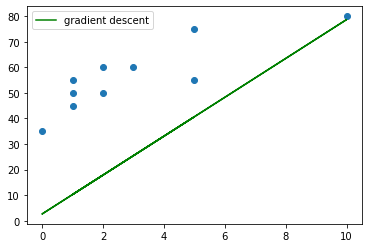

In [24]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

### Домашнее задание <a class="anchor" id="hw"></a><center>

1. Подберите скорость обучения (eta) и количество итераций

In [25]:
n = X.shape[0]

eta = 1
n_iter = 150

eta_dict = dict()
while eta > 0:
    alpha = eta
    W = np.array([1, 0.5])
#     print(f'Number of objects = {n} \
#            \nLearning rate = {alpha} \
#            \nInitial weights = {W} \n')

    for i in range(n_iter):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * X[:, k] @ (y_pred - y))
        if i % 10 == 0:
            alpha /= 1.1
#             print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
    
    eta_dict[eta] = round(err, 2)
    eta -= 0.001

C:\Users\User\AppData\Local\Temp\ipykernel_12396\551712401.py:6: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
D:\Progs\Anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\User\AppData\Local\Temp\ipykernel_12396\356087162.py:23: RuntimeWarning: overflow encountered in multiply
  eta_dict[eta] = round(err, 2)


In [26]:
eta_dict

{1: inf,
 0.999: inf,
 0.998: inf,
 0.997: inf,
 0.996: inf,
 0.995: inf,
 0.994: inf,
 0.993: inf,
 0.992: inf,
 0.991: inf,
 0.99: inf,
 0.989: inf,
 0.988: inf,
 0.987: inf,
 0.986: inf,
 0.985: inf,
 0.984: inf,
 0.983: inf,
 0.982: inf,
 0.981: inf,
 0.98: inf,
 0.979: inf,
 0.978: inf,
 0.977: inf,
 0.976: inf,
 0.975: inf,
 0.974: inf,
 0.973: inf,
 0.972: inf,
 0.971: inf,
 0.97: inf,
 0.969: inf,
 0.968: inf,
 0.967: inf,
 0.966: inf,
 0.965: inf,
 0.964: inf,
 0.963: inf,
 0.962: inf,
 0.961: inf,
 0.96: inf,
 0.959: inf,
 0.958: inf,
 0.957: inf,
 0.956: inf,
 0.955: inf,
 0.954: inf,
 0.953: inf,
 0.952: inf,
 0.951: inf,
 0.95: inf,
 0.949: inf,
 0.948: inf,
 0.947: inf,
 0.946: inf,
 0.945: inf,
 0.944: inf,
 0.943: inf,
 0.942: inf,
 0.941: inf,
 0.94: inf,
 0.939: inf,
 0.938: inf,
 0.9369999999999999: inf,
 0.9359999999999999: inf,
 0.9349999999999999: inf,
 0.9339999999999999: inf,
 0.9329999999999999: inf,
 0.9319999999999999: inf,
 0.9309999999999999: inf,
 0.929999

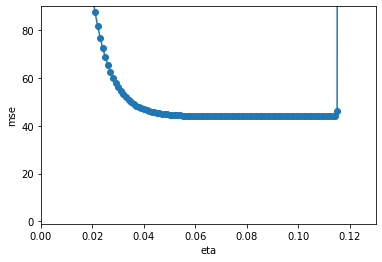

In [27]:
plt.scatter(eta_dict.keys(), eta_dict.values())
plt.plot(eta_dict.keys(), eta_dict.values())
plt.ylim(-1, 90)
plt.xlim(0, 0.13)
plt.ylabel('mse')
plt.xlabel('eta')
plt.show()

Видим по графику, что при eta > 0.1 уходит сильно вверх по mse</br>
Рассмотрим случаи, когда eta > 0.04 и eta < 0.13

In [33]:
n = X.shape[0]

eta = 0.13
n_iter = 150

eta_dict = dict()
while eta > 0.04:
    alpha = eta
    W = np.array([1, 0.5])
    print(f'Number of objects = {n} \
           \nLearning rate = {alpha} \
           \nInitial weights = {W} \n')

    for i in range(n_iter):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * X[:, k] @ (y_pred - y))
        if i % 10 == 0:
            alpha /= 1.1
            print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
    
    eta_dict[eta] = round(err, 2)
    eta -= 0.001

Number of objects = 10            
Learning rate = 0.13            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [15.04 49.51], MSE = 3047.75
Iteration #10: W_new = [ 672815.66457058 3710177.80200649], MSE = 25190632771408.94
Iteration #20: W_new = [1.78787317e+10 9.85952678e+10], MSE = 2.2961446815739326e+22
Iteration #30: W_new = [1.26816059e+14 6.99348450e+14], MSE = 1.5045244219754815e+30
Iteration #40: W_new = [2.27696850e+17 1.25567251e+18], MSE = 6.384042043248301e+36
Iteration #50: W_new = [9.71210287e+19 5.35590221e+20], MSE = 1.5482944051237112e+42
Iteration #60: W_new = [9.11186672e+21 5.02489191e+22], MSE = 1.8449055943926787e+46
Iteration #70: W_new = [1.71023005e+23 9.43135081e+23], MSE = 8.966808208634299e+48
Iteration #80: W_new = [5.70081768e+23 3.14381163e+24], MSE = 1.407719177485527e+50
Iteration #90: W_new = [2.89542818e+23 1.59673249e+24], MSE = 5.290402459702466e+49
Iteration #100: W_new = [1.82822590e+22 1.00820587e+23], MSE = 3.2004758058254648e+47
Itera

Iteration #80: W_new = [7.05562386e+17 3.89094225e+18], MSE = 3.2756937711863427e+38
Iteration #90: W_new = [3.52363386e+16 1.94316706e+17], MSE = 1.245973271320458e+36
Iteration #100: W_new = [1.59206254e+14 8.77969621e+14], MSE = 4.112866616529089e+31
Iteration #110: W_new = [4.22117127e+10 2.32783579e+11], MSE = 5.097880241582152e+24
Iteration #120: W_new = [ 324927.02042798 1792725.02597307], MSE = 613589060240451.2
Iteration #130: W_new = [-96.65522709  29.61941943], MSE = 10124.62
Iteration #140: W_new = [-61.52497224  23.1404947 ], MSE = 5708.71
Number of objects = 10            
Learning rate = 0.11599999999999999            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [13.528 44.232], MSE = 3047.75
Iteration #10: W_new = [125552.67594366 692214.58935567], MSE = 1190870411680.66
Iteration #20: W_new = [6.83661692e+08 3.77016699e+09], MSE = 4.609734698448391e+19
Iteration #30: W_new = [9.31777367e+11 5.13844275e+12], MSE = 1.1296616220204184e+26
Iteration #40: W_new = [2

Iteration #140: W_new = [45.02946814  3.81848982], MSE = 43.97
Number of objects = 10            
Learning rate = 0.10099999999999998            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.908 38.577], MSE = 3047.75
Iteration #10: W_new = [14819.94315179 81573.12539676], MSE = 24424454156.06
Iteration #20: W_new = [10542447.09208232 58137891.14733613], MSE = 1.646297909588023e+16
Iteration #30: W_new = [1.70119912e+09 9.38154797e+09], MSE = 5.7698625918681455e+20
Iteration #40: W_new = [5.69167368e+10 3.13876902e+11], MSE = 8.847106631647795e+23
Iteration #50: W_new = [3.53814118e+11 1.95116737e+12], MSE = 4.786979096542503e+25
Iteration #60: W_new = [3.55348462e+11 1.95962876e+12], MSE = 6.952664451837079e+25
Iteration #70: W_new = [4.79999431e+10 2.64703746e+11], MSE = 1.8948831549940022e+24
Iteration #80: W_new = [6.79260969e+08 3.74589843e+09], MSE = 5.95843668759531e+20
Iteration #90: W_new = [ 703645.24802167 3880126.08990198], MSE = 1078480886435495.4
Iteration #100

Iteration #30: W_new = [ 612913.72893016 3379800.36628441], MSE = 128916486804036.22
Iteration #40: W_new = [1108421.84242789 6112350.62122932], MSE = 601356367673134.6
Iteration #50: W_new = [ 287237.885178   1583787.14104428], MSE = 59548842817156.77
Iteration #60: W_new = [ 8551.81244645 46922.25228678], MSE = 80636857758.42
Iteration #70: W_new = [ 65.26690774 119.56910049], MSE = 805232.57
Iteration #80: W_new = [44.54079345  3.92226269], MSE = 44.13
Iteration #90: W_new = [44.68862921  3.88029575], MSE = 44.04
Iteration #100: W_new = [44.78747631  3.86237131], MSE = 44.01
Iteration #110: W_new = [44.8543808   3.85023921], MSE = 43.99
Iteration #120: W_new = [44.9009154   3.84180088], MSE = 43.98
Iteration #130: W_new = [44.93409097  3.835785  ], MSE = 43.98
Iteration #140: W_new = [44.95827795  3.83139906], MSE = 43.97
Number of objects = 10            
Learning rate = 0.08499999999999996            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [10.18  32.545], MSE = 3047.

Iteration #0: W_new = [ 8.56 26.89], MSE = 3047.75
Iteration #10: W_new = [ 46.84015904 137.01743355], MSE = 199535.21
Iteration #20: W_new = [ 63.93226666 179.63953959], MSE = 514660.12
Iteration #30: W_new = [43.22022081 37.55226484], MSE = 26599.27
Iteration #40: W_new = [40.24736303  5.36719627], MSE = 73.69
Iteration #50: W_new = [41.76953292  4.41071466], MSE = 49.51
Iteration #60: W_new = [42.78099228  4.22621633], MSE = 46.61
Iteration #70: W_new = [43.42731998  4.10901469], MSE = 45.31
Iteration #80: W_new = [43.85396092  4.03164993], MSE = 44.7
Iteration #90: W_new = [44.14404467  3.97904771], MSE = 44.39
Iteration #100: W_new = [44.34663984  3.9423102 ], MSE = 44.22
Iteration #110: W_new = [44.49161367  3.91602143], MSE = 44.13
Iteration #120: W_new = [44.59766591  3.8967905 ], MSE = 44.07
Iteration #130: W_new = [44.67681183  3.8824386 ], MSE = 44.04
Iteration #140: W_new = [44.73695822  3.87153198], MSE = 44.02
Number of objects = 10            
Learning rate = 0.068999999

Iteration #20: W_new = [28.93774553  6.74528104], MSE = 177.49
Iteration #30: W_new = [34.15786897  5.789892  ], MSE = 104.53
Iteration #40: W_new = [37.4168824   5.19891487], MSE = 73.53
Iteration #50: W_new = [39.52312699  4.81697989], MSE = 59.38
Iteration #60: W_new = [40.92803268  4.5622219 ], MSE = 52.5
Iteration #70: W_new = [41.89233041  4.38736138], MSE = 48.96
Iteration #80: W_new = [42.57158958  4.2641882 ], MSE = 47.04
Iteration #90: W_new = [43.06144438  4.17536058], MSE = 45.94
Iteration #100: W_new = [43.42231764  4.10992178], MSE = 45.29
Iteration #110: W_new = [43.69335949  4.06077252], MSE = 44.88
Iteration #120: W_new = [43.90053238  4.02320491], MSE = 44.63
Iteration #130: W_new = [44.06142598  3.99402934], MSE = 44.46
Iteration #140: W_new = [44.18819546  3.97104165], MSE = 44.34
Number of objects = 10            
Learning rate = 0.05499999999999994            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.94  21.235], MSE = 3047.75
Iteration #10: W_new =

Iteration #50: W_new = [37.05765404  5.26405539], MSE = 75.78
Iteration #60: W_new = [38.76349288  4.95472782], MSE = 63.57
Iteration #70: W_new = [39.99543044  4.73133494], MSE = 56.6
Iteration #80: W_new = [40.90416541  4.56654986], MSE = 52.44
Iteration #90: W_new = [41.58749141  4.44263923], MSE = 49.86
Iteration #100: W_new = [42.11035253  4.34782643], MSE = 48.21
Iteration #110: W_new = [42.51680641  4.27412228], MSE = 47.11
Iteration #120: W_new = [42.83733559  4.21599926], MSE = 46.36
Iteration #130: W_new = [43.09341804  4.16956265], MSE = 45.84
Iteration #140: W_new = [43.30044478  4.13202155], MSE = 45.46
Number of objects = 10            
Learning rate = 0.04499999999999993            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.86  17.465], MSE = 3047.75
Iteration #10: W_new = [17.47429152  8.8167991 ], MSE = 430.78
Iteration #20: W_new = [25.52486538  7.35534881], MSE = 236.6
Iteration #30: W_new = [30.77833035  6.40271393], MSE = 146.28
Iteration #40: W_new =

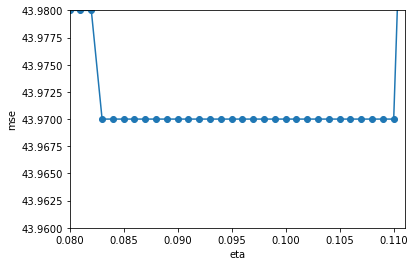

In [84]:
plt.scatter(eta_dict.keys(), eta_dict.values())
plt.plot(eta_dict.keys(), eta_dict.values())
plt.ylim(43.96, 43.98)
plt.xlim(0.08, 0.111)
plt.ylabel('mse')
plt.xlabel('eta')
plt.show()

Видим, что mse принимает минимальное значение при eta от 0.08 до 0.11. Осталось подобрать наиболее оптимальное сочетание количества итераций и eta

In [90]:
n = X.shape[0]

eta = 0.11
n_iter = 150

eta_dict = dict()
while eta > 0.08:
    alpha = eta
    W = np.array([1, 0.5])
    best_iter = None
    print(f'Number of objects = {n} \
           \nLearning rate = {alpha} \
           \nInitial weights = {W} \n')

    for i in range(n_iter):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * X[:, k] @ (y_pred - y))
        if i % 10 == 0:
            alpha /= 1.1
            if round(err, 2) == 43.97 and best_iter is None:
                best_iter = i
            print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
    if round(err, 2) == 43.97 and best_iter is None:
                best_iter = i
    eta_dict[eta] = (round(err, 2), best_iter)
    eta = round(eta - 0.001, 3)

Number of objects = 10            
Learning rate = 0.11            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [12.88 41.97], MSE = 3047.75
Iteration #10: W_new = [ 56081.81851188 309110.78394788], MSE = 275078953156.41
Iteration #20: W_new = [1.42124114e+08 7.83767083e+08], MSE = 2.321331513111192e+18
Iteration #30: W_new = [8.70617212e+10 4.80116481e+11], MSE = 1.1572863370435996e+24
Iteration #40: W_new = [1.19736931e+13 6.60309412e+13], MSE = 2.9511706147500425e+28
Iteration #50: W_new = [3.37923409e+14 1.86353538e+15], MSE = 3.226537900137041e+31
Iteration #60: W_new = [1.74908668e+15 9.64563219e+15], MSE = 1.2135070419308285e+33
Iteration #70: W_new = [1.43829443e+15 7.93171617e+15], MSE = 1.1855136360030054e+33
Iteration #80: W_new = [1.55538781e+14 8.57744723e+14], MSE = 2.0801633934164108e+31
Iteration #90: W_new = [1.70775141e+12 9.41768193e+12], MSE = 3.962327437818262e+27
Iteration #100: W_new = [1.31003158e+09 7.22438888e+09], MSE = 3.970181195854728e+21
Iteration

Iteration #40: W_new = [1.04296148e+09 5.75158597e+09], MSE = 3.677532113755767e+20
Iteration #50: W_new = [2.04696524e+09 1.12883333e+10], MSE = 2.0177656450275098e+21
Iteration #60: W_new = [5.80500724e+08 3.20126847e+09], MSE = 2.3893801822872384e+20
Iteration #70: W_new = [1.90412673e+07 1.05006024e+08], MSE = 3.957578113005693e+17
Iteration #80: W_new = [ 52879.17529593 291368.25903603], MSE = 4993533867469.77
Iteration #90: W_new = [52.59078127 46.6075688 ], MSE = 193611.0
Iteration #100: W_new = [44.90265016  3.84164328], MSE = 43.98
Iteration #110: W_new = [44.9450473   3.83379824], MSE = 43.98
Iteration #120: W_new = [44.97372597  3.8285978 ], MSE = 43.97
Iteration #130: W_new = [44.99365014  3.82498486], MSE = 43.97
Iteration #140: W_new = [45.00783974  3.8224118 ], MSE = 43.97
Number of objects = 10            
Learning rate = 0.094            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.152 35.938], MSE = 3047.75
Iteration #10: W_new = [ 4661.34052231 25558.4000

In [91]:
eta_dict

{0.11: (43.97, 130),
 0.109: (43.97, 130),
 0.108: (43.97, 120),
 0.107: (43.97, 120),
 0.106: (43.97, 120),
 0.105: (43.97, 120),
 0.104: (43.97, 120),
 0.103: (43.97, 120),
 0.102: (43.97, 110),
 0.101: (43.97, 110),
 0.1: (43.97, 110),
 0.099: (43.97, 110),
 0.098: (43.97, 110),
 0.097: (43.97, 110),
 0.096: (43.97, 110),
 0.095: (43.97, 120),
 0.094: (43.97, 120),
 0.093: (43.97, 120),
 0.092: (43.97, 120),
 0.091: (43.97, 130),
 0.09: (43.97, 130),
 0.089: (43.97, 130),
 0.088: (43.97, 130),
 0.087: (43.97, 140),
 0.086: (43.97, 140),
 0.085: (43.97, 140),
 0.084: (43.97, 149),
 0.083: (43.97, 149),
 0.082: (43.98, None),
 0.081: (43.98, None)}

Как видим, eta = 0.1 со 110 итерациями вполне оптимальный вариант

In [121]:
n = X.shape[0]

eta = 0.1
n_iter = 111

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888021 42641607.37852186], MSE = 9128819654907568.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266843e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815933e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500074e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126475957e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.640858952828383e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874439e+19
Iteration #90: W_new = [116395.49988139 641638.79864291], MSE = 31317286806394.04
Iteration #100: W_new = [48.41966454 22.99883908], MSE = 53518.86
Iteration #110: W_new = [44.9771605   3.827983

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [119]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(y_pred - y, X))
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [170]:
n = X.shape[0]

eta = 0.1
n_iter = 111
eps = 0.01
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
W_changes = [False for i in range(len(W))]

counter = 0
while True:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W_prev = W[k]
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
        W_changes[k] = abs(W[k] - W_prev) < eps
    if counter % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{counter}: W_new = {W}, MSE = {round(err, 2)}')
    if all(W_changes):
        break
    counter += 1
print(f'Iteration #{counter}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888021 42641607.37852186], MSE = 9128819654907568.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266843e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815933e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500074e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126475957e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.640858952828383e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874439e+19
Iteration #90: W_new = [116395.49988139 641638.79864291], MSE = 31317286806394.04
Iteration #100: W_new = [48.41966454 22.99883908], MSE = 53518.86
Iteration #107: W_new = [44.96830525  3.828910